**This script contains the following points:**

    1. Importing libraries
    2. Importing data
    3. Visualizing data
        3.1 Histogram (Question 3)
        3.2 Bar chart (Question 4)
        3.3 Line graph
            3.3.1 Split the dataframe
            3.3.2 Line graph: expenditure (Question 5)
            3.3.3 Line graph: customer demographics (Question 6)
        3.4 Scatterplot (Question 7)
    4. Exporting visualizations

# 1. Importing libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2. Importing data

In [2]:
# Turn project folder path into a string
path = r'/Users/sarahtischer/Desktop/CareerFoundry/Data Immersion/Achievement 4/01-2024_Instacart_Basket_Analysis'

In [3]:
# Import "orders_products_customers_merged.pkl"
df_all = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared_data', 'orders_products_customers_merged.pkl'))

In [4]:
df_all.shape

(32404859, 31)

# 3. Visualizing data

In [5]:
# Define common formatting settings
chart_color = '#F39C12' #orange
size = [6, 4]
transparency = 0.8

# Function to apply formatting
def apply_formatting(chart_type):
    
    # Common formatting settings
    title_fontsize = 12
    label_fontsize = 10
    tick_fontsize = 8
    
    # Add gridlines
    plt.grid(axis='y', alpha=0.75)

    # Set labels and title for individual visualizations
    if chart_type == 'histogram':
        plt.xlabel('Hour of the Day', fontsize=label_fontsize)
        plt.ylabel('Frequency', fontsize=label_fontsize)
        plt.title('Order Hour of the Day Histogram', fontsize=title_fontsize)
        
    elif chart_type == 'bar':
        plt.xlabel('Frequency', fontsize=label_fontsize)
        plt.ylabel('Loyalty Flag', fontsize=label_fontsize)
        plt.title('Loyalty Flag Bar Chart', fontsize=title_fontsize)
        
    elif chart_type == 'line_exp':
        plt.xlabel('Order Hour of the Day', fontsize=label_fontsize)
        plt.ylabel('Prices', fontsize=label_fontsize)
        plt.title('Order Hour of the Day vs. Prices', fontsize=title_fontsize)
        
    elif chart_type == 'line_demo':
        plt.xlabel('Age', fontsize=label_fontsize)
        plt.ylabel('Dependants', fontsize=label_fontsize)
        plt.title('Age vs. Dependants', fontsize=title_fontsize)
    
    elif chart_type == 'scatter':
        plt.xlabel('Income', fontsize=label_fontsize)
        plt.ylabel('Age', fontsize=label_fontsize)
        plt.title('Income vs. Age Scatterplot', fontsize=title_fontsize)

    # Set font sizes for ticks
    plt.tick_params(axis='x', labelsize=tick_fontsize)
    plt.tick_params(axis='y', labelsize=tick_fontsize)

## 3.1 Histogram

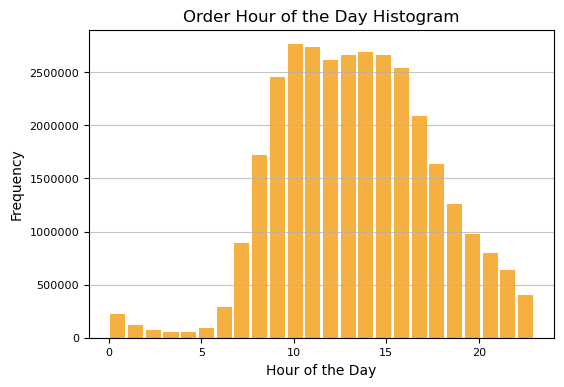

In [6]:
# Create histogram
hist = df_all['order_hour_of_day'].plot.hist(bins=24, figsize=size, alpha=transparency, rwidth=0.85, color=chart_color)

# Apply formatting for histogram
apply_formatting('histogram')

# Disable scientific notation on y-axis
plt.ticklabel_format(style='plain', axis='y')

plt.show()

#### *<mark>Notes</mark>*
* The highest order counts are from 10am to 4pm, indicating high activity or demand during those times.
* There are lower order counts during early morning hours (e.g., 12am - 6am) and late night hours (e.g., 9pm - 11pm), suggesting reduced activity or fewer orders during those times.

## 3.2 Bar chart

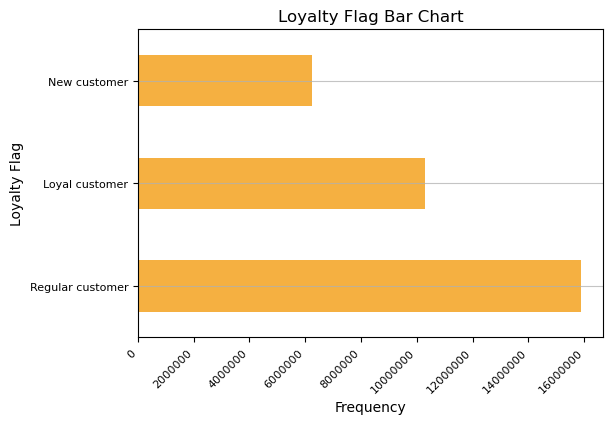

In [7]:
# Create bar chart
bar = df_all['loyalty_flag'].value_counts().plot.barh(figsize=size, alpha=transparency, color=chart_color)

# Apply formatting for bar chart
apply_formatting('bar')

# Disable scientific notation on x-axis
plt.ticklabel_format(style='plain', axis='x')

# Rotate tick labels on x-axis
plt.xticks(rotation=45, ha='right')

plt.show()

#### *<mark>Notes</mark>*

* Regular customers are the most common group, with a count of almost 16,000,000. These customers have made orders ranging from over 10 to 40 in total, indicating they are frequent buyers but not necessarily as loyal as the "Loyal customers" group.
* Loyal customers are the second most common group, with a count of > 10,000,000. These customers have made more than 40 orders in total, indicating a high level of loyalty to the brand. They are likely to be repeat buyers who regularly use the service or purchase products.
* New customers are the least common group, with a count of ~ 6,000,000. These customers have made less than or equal to 10 orders in total. They are new to the service or product and may not have established loyalty yet.

## 3.3 Line graph

### 3.3.1 Split the dataframe

In [8]:
# Create a sample set at 70/30 ratio
np.random.seed(4)
dev = np.random.rand(len(df_all)) <= 0.7

In [9]:
# Store 70% of the sample in the dataframe df_sub_big
df_sub_big = df_all[dev]

In [10]:
# Store 30% of the sample in the dataframe df_sub_small
df_sub_small = df_all[~dev]

In [11]:
# Check the output
len(df_all)

32404859

In [12]:
len(df_sub_big) + len(df_sub_small)

32404859

### 3.3.2 Line graph: expenditure

In [13]:
# Create an expenditure subset of dataframe df_sub_small
df_small_exp = df_sub_small[['order_hour_of_day','prices']]

In [14]:
# Check the output
df_small_exp.head()

,order_hour_of_day,prices
0,11,5.8
2,13,20.0
3,14,20.0
6,13,4.4
10,9,12.8


/Users/sarahtischer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sarahtischer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


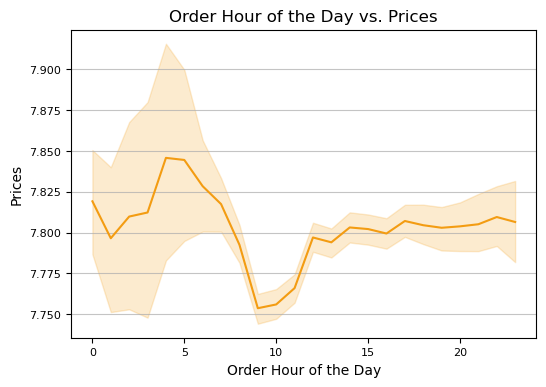

In [15]:
# Set figure size 
plt.figure(figsize=size)  

# Create line graph
line_exp = sns.lineplot(data=df_small_exp, x='order_hour_of_day', y='prices', color=chart_color)

# Apply formatting for line graph
apply_formatting('line_exp')

plt.show()

#### *<mark>Notes</mark>*

* Rising prices from 1 a.m. to 6 a.m.:

This trend could be influenced by several factors, such as increased demand for certain products or services during the early morning hours, limited availability of goods during these hours, or the convenience premium associated with early morning purchases. In addition, suppliers may adjust prices based on real-time data and demand patterns to maximize profitability.

* Decreasing prices after 5 a.m. with a low point around 9 a.m.:

The drop in prices after 5 a.m., with a low point around 9 a.m., could be attributed to several factors. One possible explanation is that the initial surge in demand during the early morning hours tapers off as the day progresses, leading sellers to adjust prices downward to stimulate further sales. In addition, more products may become available as the day progresses, leading to increased competition and lower prices.

* Price difference between morning and evening hours:

The observed price difference between morning and evening hours could be driven by shifts in consumer behavior and market dynamics throughout the day. For example, consumers may be more willing to pay higher prices for convenience or urgent purchases in the early morning, while price sensitivity may decrease in the evening hours when there are more options and less urgency to make purchases.

* Overall pricing trend:

The overall pricing trend of increasing prices in the early morning, peaking before breakfast, dropping significantly before 10 a.m., and gradually increasing again in the afternoon and evening may reflect a combination of supply and demand dynamics, consumer preferences, and operational considerations. Suppliers may dynamically adjust prices to optimize revenue and adapt to changing market conditions throughout the day.

### 3.3.3 Line graph: customer demographics

In [16]:
# Create a demographics subset of dataframe df_sub_small
df_small_demo = df_sub_small[['age','dependants']]

In [17]:
# Check the output
df_small_demo.head()

,age,dependants
0,81,1
2,81,1
3,81,1
6,81,1
10,81,1


/Users/sarahtischer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sarahtischer/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


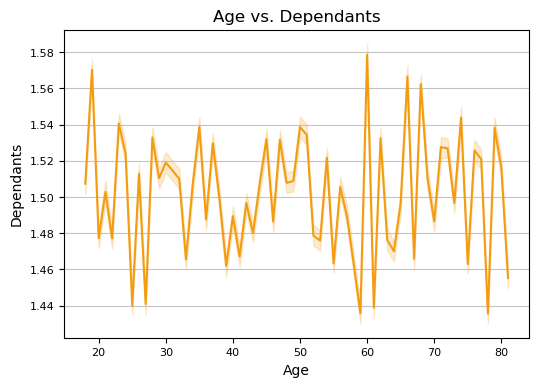

In [18]:
# Set figure size 
plt.figure(figsize=size)  

# Create line graph
line_demo = sns.lineplot(data=df_small_demo, x='age', y='dependants', color=chart_color)

# Apply formatting for line graph
apply_formatting('line_demo')

plt.show()

#### *<mark>Notes</mark>*

* The line graph shows that there is no relationship between age and number of dependents.

## 3.4 Scatterplot

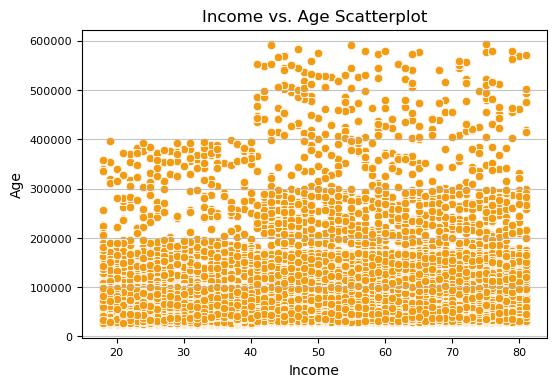

In [19]:
# Set figure size 
plt.figure(figsize=size)

# Create scatter plot
scatter = sns.scatterplot(data=df_all, x='age', y='income', color=chart_color)

# Apply formatting for scatter plot
apply_formatting('scatter')

plt.show()

#### *<mark>Notes</mark>*

* The scatterplot shows that the vast majority of people in all age groups have incomes < 200,000.
* The maximum income for people under 40 is 400,000.
* Only a minority of people over 40 have incomes up to 600,000.

# 4. Exporting visualizations

In [20]:
# Export histogram
hist.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '9_hist_order_hour_of_day.png'), bbox_inches='tight')

In [21]:
# Export bar chart
bar.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '9_bar_loyalty_flag.png'), bbox_inches='tight')

In [22]:
# Export line graph (expenditure)
line_exp.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '9_line_expenditure.png'), bbox_inches='tight')

In [23]:
# Export line graph (demographics)
line_demo.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '9_line_demographics.png'), bbox_inches='tight')

In [24]:
# Export line graph ()
scatter.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', '9_scatter_age_income.png'), bbox_inches='tight')